# EEHEMT Model test run

In [2]:
import verilogae
import numpy as np
import sys
import matplotlib.pyplot as plt
# import eehemt
# import bsimcmg

In [3]:
# model  = eehemt
# model =verilogae.load('./bsimcmg_chyoto/bsimcmg.va')
# model =verilogae.load('./bsimcmg_fromDarsen/bsimcmg.va')
import verilogae
model =verilogae.load('./eehemt/eehemt114_2.va')
# model =verilogae.load('./eehemt/eehemttest.va')

model.functions

{'Vds2': <verilogae.VaeFun at 0x7f4028bb6ac0>,
 'Vgs2': <verilogae.VaeFun at 0x7f4028bb6b90>,
 'Vds': <verilogae.VaeFun at 0x7f4028bb6c60>,
 'Vgs': <verilogae.VaeFun at 0x7f4028bb6d30>,
 'Vgs1': <verilogae.VaeFun at 0x7f4028bb6e00>,
 'Vts': <verilogae.VaeFun at 0x7f4028bb6ed0>,
 'Vt': <verilogae.VaeFun at 0x7f4028b44030>,
 'Vg': <verilogae.VaeFun at 0x7f4028b44100>,
 'Vx': <verilogae.VaeFun at 0x7f4028b441d0>,
 'Igs': <verilogae.VaeFun at 0x7f4028b442a0>,
 'Igd': <verilogae.VaeFun at 0x7f4028b44370>,
 'Ids': <verilogae.VaeFun at 0x7f4028b44440>,
 'WJcheck': <verilogae.VaeFun at 0x7f4028b445e0>,
 'Deltgm_N': <verilogae.VaeFun at 0x7f4028b446b0>,
 'I_ds': <verilogae.VaeFun at 0x7f4028b44780>,
 'Vc': <verilogae.VaeFun at 0x7f4028b44850>,
 'Vb': <verilogae.VaeFun at 0x7f4028b44920>,
 'Va': <verilogae.VaeFun at 0x7f4028b449f0>,
 'Idsv_All': <verilogae.VaeFun at 0x7f4028b44ac0>,
 'tempsqrt': <verilogae.VaeFun at 0x7f4028b44b90>,
 'Idsvtemp': <verilogae.VaeFun at 0x7f4028b44c60>,
 'gmoff': <v

In [4]:
# model.functions
# dir(model.functions.values)
# model.modelcard

In [20]:
import pandas as pd

# 讀取 CSV
df = pd.read_csv("S25E02A025WS_25C_IDGMVG_0.5VD.csv")


vgs = df['vg'].values
Id=  df['id'].values
# vds    = np.full_like(vgs, 0.1)
vds    = np.full_like(vgs, 0.5)
print(vgs)
print(vds)
sweep_bias = {
        'br_gisi': vgs,
        'br_disi': vds
        }




modelcard = {name : param.default for (name,param) in model.modelcard.items()}

# modelcard['Deltgm'] = 0.252
# modelcard['Rd'] = 1
# modelcard['Rs'] = 2
# modelcard['Gamma'] = 0.0095
# modelcard['Vch'] = 1.4
# modelcard['Nbr'] = 8.6()

modelcard['LENGTH'] = 10000*10**(-9)
modelcard['TFIN'] = 55*10**(-9)
modelcard['NF'] = 20

id_temp = model.functions['I_ds'].eval(
    temperature = 300,
    voltages = sweep_bias,
    **modelcard
)


for mc_dict in modelcard:
    print("%s = %.2e" % (mc_dict, modelcard[mc_dict]))
print(id_temp)


[-3.000e-01 -2.750e-01 -2.500e-01 -2.250e-01 -2.000e-01 -1.750e-01
 -1.500e-01 -1.250e-01 -1.000e-01 -7.500e-02 -5.000e-02 -2.500e-02
  5.550e-17  2.500e-02  5.000e-02  7.500e-02  1.000e-01  1.250e-01
  1.500e-01  1.750e-01  2.000e-01  2.250e-01  2.500e-01  2.750e-01
  3.000e-01  3.250e-01  3.500e-01  3.750e-01  4.000e-01  4.250e-01
  4.500e-01  4.750e-01  5.000e-01  5.250e-01  5.500e-01  5.750e-01
  6.000e-01  6.250e-01  6.500e-01  6.750e-01  7.000e-01  7.250e-01
  7.500e-01  7.750e-01  8.000e-01  8.250e-01  8.500e-01  8.750e-01
  9.000e-01  9.250e-01  9.500e-01  9.750e-01  1.000e+00  1.025e+00
  1.050e+00  1.075e+00  1.100e+00  1.125e+00  1.150e+00  1.175e+00
  1.200e+00]
[0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5 0.5
 0.5 0.5 0.5 0.5 0.5 0.5 0.5]
UGW_N = 1.00e+00
NGF_N = 1.00e+00
Temp_N = 2.50e+01
on_off = 0.00e+0

In [25]:
id_ = id_temp
# id_ = id_temp*1000000/(2*50)
id_ = id_temp*15000


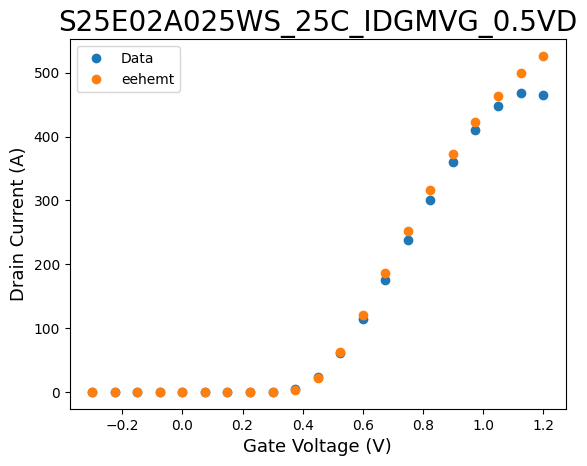

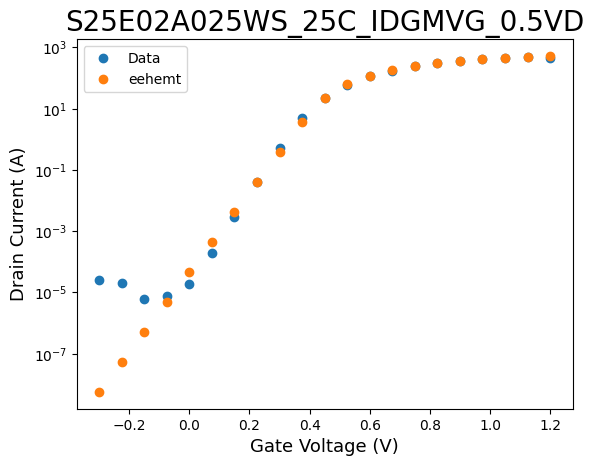

In [27]:
# Id, Vg, Vds = getIV1(files[0])
_fig = plt.figure()
plt.title("S25E02A025WS_25C_IDGMVG_0.5VD", fontsize=20)
plt.xlabel("Gate Voltage (V)", fontsize=13)
plt.ylabel("Drain Current (A)", fontsize=13)
plt.plot(vgs, Id, label='Data', markevery=3, linestyle=' ', marker='o')
plt.plot(vgs, id_, label='eehemt', markevery=3, linestyle=' ', marker='o')
plt.legend()


_fig = plt.figure()
plt.title("S25E02A025WS_25C_IDGMVG_0.5VD", fontsize=20)
plt.xlabel("Gate Voltage (V)", fontsize=13)
plt.ylabel("Drain Current (A)", fontsize=13)
plt.plot(vgs, Id, label='Data', markevery=3, linestyle=' ', marker='o')
plt.plot(vgs, id_, label='eehemt', markevery=3, linestyle=' ', marker='o')
plt.yscale('log')
plt.legend()

NOT CHECK YET

# FIT Parameters for EEHEMT Model

In [8]:
from mtds.helper import *

temp =300

Fit_Lin_Sat_paras = [['Deltgm','Rd','Rs','Gamma','Vch']]

Init_Lin_Sat_val = [[0.252, 1, 2, 0.0095, 1.4]]

linear_param_bounds=[([-np.inf, -np.inf, -np.inf, -np.inf, -np.inf],[np.inf, np.inf, np.inf, np.inf, np.inf])]

files = ["./S25E02A025WS_25C_GMVG.csv"]

states = ["linear"]

import verilogae
model =verilogae.load('./eehemt/soimg_20081222_yaosj.va')
modelcard = {name : param.default for (name,param) in model.modelcard.items()}

In [9]:
def getIV1 (file):
    
    df = pd.read_csv(file)
    Id = df.id.values/(1000000/(2*25))    # mA/mm to A
#     Id = df.id.values/(14500)    # mA/mm to A
    
    Vg = df.vg.values

    display(df)

    return Id, Vg, 1.5

,vg,id
0,-0.300,0.000118
1,-0.275,0.000072
2,-0.250,0.000049
3,-0.225,0.000035
4,-0.200,0.000025
...,...,...
56,1.100,520.400000
57,1.125,532.600000
58,1.150,543.280000
59,1.175,552.120000


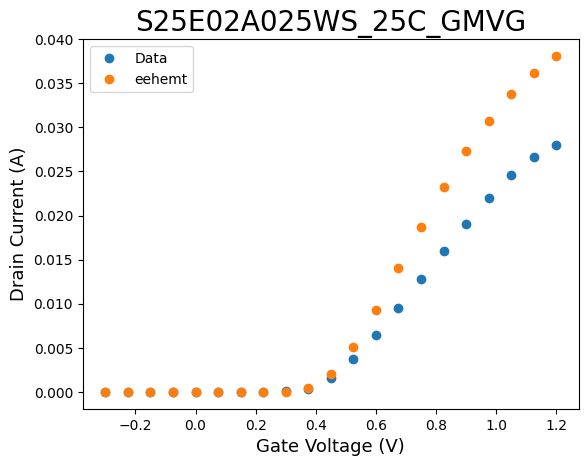

In [33]:
Id, Vg, Vds = getIV1(files[0])
_fig = plt.figure()
plt.title("S25E02A025WS_25C_GMVG", fontsize=20)
plt.xlabel("Gate Voltage (V)", fontsize=13)
plt.ylabel("Drain Current (A)", fontsize=13)
plt.plot(Vg, Id, label='Data', markevery=3, linestyle=' ', marker='o')
plt.plot(vgs, id_, label='eehemt', markevery=3, linestyle=' ', marker='o')
plt.legend()


******************************
******* linear fitting *******


,vg,id
0,-0.300,0.000118
1,-0.275,0.000072
2,-0.250,0.000049
3,-0.225,0.000035
4,-0.200,0.000025
...,...,...
56,1.100,520.400000
57,1.125,532.600000
58,1.150,543.280000
59,1.175,552.120000


1232 0
=== Initial parameters ===
Deltgm  =  0.18844192864181875
Rd  =  0.9999999999999954
Rs  =  2.0000000000000133
Gamma  =  9.287326039974102e-06
Vch  =  1174.5286692893999
=== Optimized parameters ===
Deltgm  =  0.3906768128100212
Rd  =  0.9999999999999086
Rs  =  2.0000000000001137
Gamma  =  3.282462450846059e-05
Vch  =  1596.6256590676003


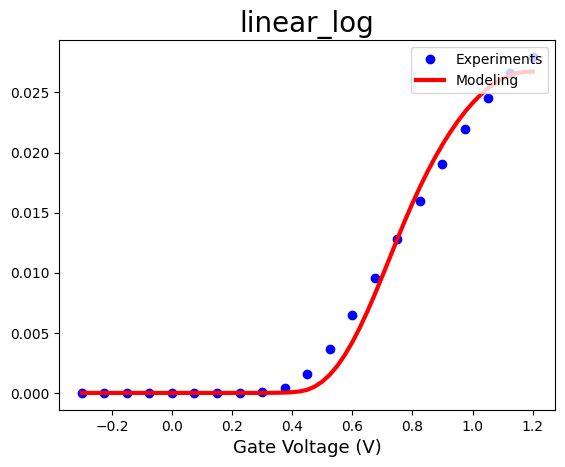

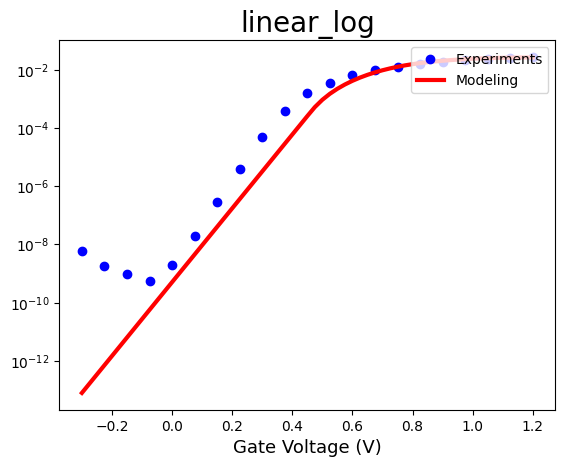

[7.82360856e-14 1.62452189e-13 3.37321500e-13 7.00426353e-13
 1.45439018e-12 3.01994746e-12 6.27072625e-12 1.30207589e-11
 2.70367666e-11 5.61401031e-11 1.16571306e-10 2.42052803e-10
 5.02607043e-10 1.04363113e-09 2.16703278e-09 4.49970388e-09
 9.34334509e-09 1.94008539e-08 4.02846226e-08 8.36484222e-08
 1.73690557e-07 3.60657247e-07 7.48881527e-07 1.55500422e-06
 3.22886604e-06 6.70453222e-06 1.39215290e-05 2.89071577e-05
 6.00238498e-05 1.24635655e-04 2.58797905e-04 5.26437511e-04
 9.40687963e-04 1.51134330e-03 2.24803126e-03 3.15251401e-03
 4.21860473e-03 5.43246065e-03 6.77323887e-03 8.21408372e-03
 9.72339904e-03 1.12663477e-02 1.28141191e-02 1.43376509e-02
 1.57817966e-02 1.71381078e-02 1.84054329e-02 1.95833981e-02
 2.06718352e-02 2.16706540e-02 2.25798005e-02 2.33992400e-02
 2.41289485e-02 2.47689091e-02 2.53191092e-02 2.57795393e-02
 2.61501919e-02 2.64310612e-02 2.66221425e-02 2.67234318e-02
 2.67349259e-02]
RMS = 7.888342330147766 %


In [34]:
N=0

for file, Fit_paras, Init_val, param_bounds, state in zip(files, Fit_Lin_Sat_paras, Init_Lin_Sat_val, linear_param_bounds, states):
    print('******************************')
    print('*******', state, 'fitting *******')
    
    Id, Vg, Vds = getIV1(file)
    Idd = Id    
    updated_paras, Id_fit = BSIM_fit(Idd, Vg, Vds, Fit_paras, Init_val, param_bounds, state, temp, modelcard)
    Init_Lin_Sat_val[N] = updated_paras
    
    RMS = rms(Id, Id_fit)
    print(Id_fit)
    print("RMS =",RMS,"%") 
    N =+1
